In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2, l1
from tensorflow.keras import layers, Input
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, UpSampling2D
import matplotlib.pyplot as plt

## Run this first

In [ ]:
!pip install keras==2.7.0 tensorflow==2.7.0 scikit-image pillow

In [41]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
_ = tf.keras.datasets.fashion_mnist.load_data()
_ = tf.keras.datasets.cifar10.load_data()
_ = tf.keras.datasets.cifar100.load_data()
_ = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=True)

242761728/242745792 [==============================] - 23s 0us/step


#### Different dataset this time

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(classes[y_train[0][0]])
plt.imshow(X_train[0])
plt.show()

### First run model from last meeting

In [ ]:
# kernel_regularizer = None
# bias_regularizer = None
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)
input_shape = X_train.shape[1:]

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(128, activation = 'relu',
                          kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer)
])

In [ ]:
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = mlp_model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False)])

In [7]:
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=input_shape, filters=4, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=8, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(classes_cnt, activation='sigmoid'))

(32, 32, 3) (50000, 32, 32, 3) 10


In [8]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

In [ ]:
cnn_model.count_params(), mlp_model.count_params()

In [ ]:
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=input_shape, filters=16, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(classes_cnt, activation='sigmoid'))

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

In [ ]:
cnn_model.count_params(), mlp_model.count_params()

## Bigger fish showcase

In [42]:
big_fish = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=True)

In [44]:
from PIL import Image
sample_image = np.asarray(Image.open('cat.img'))
sample_image.shape

(1800, 1800, 3)

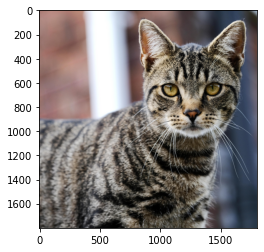

In [45]:
plt.imshow(sample_image)

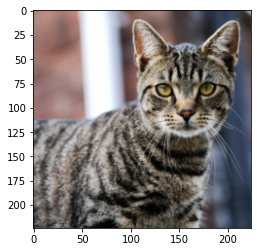

In [46]:
# ResNet accepts images of shape (224, 224, 3)
from skimage.transform import resize
image = resize(sample_image, (224, 224, 3))
plt.imshow(image)

In [48]:
image.shape

(224, 224, 3)

In [51]:
from keras.applications.resnet_v2 import decode_predictions
pred = big_fish.predict(image.reshape(1, *image.shape)) # this reshape is needed. First dim is the batch size
label = decode_predictions(pred)[0][0]
print(label[1], label[2])

tiger_cat 0.7456651


### Quick tensorflow showcase

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
def get_cnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=4, kernel_size=(2, 2), padding='same', activation='relu')(inputs)
    x = Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x) 
    x = Dense(32, activation='relu')(x) 
    outputs = Dense(classes_cnt, activation='sigmoid')(x) 
    cnn = Model(inputs=inputs, outputs=outputs)
    return cnn

In [4]:
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
big_conv = get_cnn(input_shape)

(32, 32, 3) (50000, 32, 32, 3) 10


In [5]:
big_conv.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [6]:
history = big_conv.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0163 - accuracy: 0.2354 - val_loss: 1.5396 - val_accuracy: 0.4345
Epoch 2/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4123 - accuracy: 0.4904 - val_loss: 1.2919 - val_accuracy: 0.5386
Epoch 3/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2020 - accuracy: 0.5742 - val_loss: 1.2540 - val_accuracy: 0.5586
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0628 - accuracy: 0.6222 - val_loss: 1.2285 - val_accuracy: 0.5779
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9457 - accuracy: 0.6614 - val_loss: 1.1980 - val_accuracy: 0.5933


In [7]:
big_conv.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1980 - accuracy: 0.5933


[1.1980167627334595, 0.5932999849319458]

## Transfer Learning example

In [8]:
(X_train_f, y_train_f), (X_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

In [9]:
from skimage.transform import resize
X_train_f = resize(X_train_f, (X_train_f.shape[0], 32, 32,  3))
X_test_f = resize(X_test_f, (X_test_f.shape[0], 32, 32,  3))
input_shape = X_train_f.shape[1:]
classes_cnt = len(np.unique(y_train_f))
print(input_shape, X_train.shape, classes_cnt)

(32, 32, 3) (50000, 32, 32, 3) 10


In [10]:
[[idx, layer] for idx, layer in enumerate(big_conv.layers)]

[[0, <keras.engine.input_layer.InputLayer at 0x1f4b5c18820>],
 [1, <keras.layers.convolutional.Conv2D at 0x1f4b5c8bd60>],
 [2, <keras.layers.convolutional.Conv2D at 0x1f4bef5e580>],
 [3, <keras.layers.pooling.MaxPooling2D at 0x1f4bef5e4f0>],
 [4, <keras.layers.core.flatten.Flatten at 0x1f4c0d3c8b0>],
 [5, <keras.layers.core.dense.Dense at 0x1f4bef5e5e0>],
 [6, <keras.layers.core.dense.Dense at 0x1f4c0dc9eb0>],
 [7, <keras.layers.core.dense.Dense at 0x1f4c0dd5730>]]

In [32]:
new_big_conv_net = get_cnn(input_shape)
for idx in range(6):
    new_big_conv_net.layers[idx].set_weights(big_conv.layers[idx].get_weights())
new_big_conv_net.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
for idx in range(1, 8):
    try:
        cmp = new_big_conv_net.layers[idx].get_weights()[0] == big_conv.layers[idx].get_weights()[0]
        print(idx, cmp.all())
    except:
        pass

1 True
2 True
5 True
6 False
7 False


In [34]:
new_big_conv_net.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 8.3707 - accuracy: 0.1256


[8.370657920837402, 0.12559999525547028]

In [35]:
big_conv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 4)         52        
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                             

In [36]:
new_big_conv_net.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 4)         52        
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               524416    
                                                           

In [37]:
for idx in range(6):
    new_big_conv_net.layers[idx].trainable = False

In [38]:
new_big_conv_net.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 4)         52        
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               524416    
                                                           

In [39]:
new_big_conv_net.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = new_big_conv_net.fit(X_train_f, y_train_f, batch_size=32, epochs=1, validation_data=[X_test_f, y_test_f])

1875/1875 [==============================] - 8s 4ms/step - loss: 2.1291 - accuracy: 0.2335 - val_loss: 1.8501 - val_accuracy: 0.3263


In [40]:
fresh_cnn = get_cnn(input_shape)
fresh_cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = fresh_cnn.fit(X_train_f, y_train_f, batch_size=32, epochs=1, validation_data=[X_test_f, y_test_f])

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4191 - accuracy: 0.8541 - val_loss: 0.3320 - val_accuracy: 0.8803


In [115]:
for idx in range(1, 8):
    try:
        cmp = new_big_conv_net.layers[idx].get_weights()[0] == big_conv.layers[idx].get_weights()[0]
        print(idx, cmp.all())
    except:
        pass

1 True
2 True
5 True
6 True
7 False


#### Let's change the last layer back to the one from big_conv

In [114]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)

(32, 32, 3) (50000, 32, 32, 3) 10


In [123]:
another_model = get_cnn(input_shape)
for idx in range(7):
    another_model.layers[idx].set_weights(new_big_conv_net.layers[idx].get_weights())
another_model.layers[-1].set_weights(big_conv.layers[-1].get_weights())
another_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [117]:
new_big_conv_net.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 7.2632 - accuracy: 0.0595


[7.26323127746582, 0.05950000137090683]

In [124]:
another_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.8278 - accuracy: 0.3454


[1.8278340101242065, 0.34540000557899475]

In [125]:
big_conv.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.8278 - accuracy: 0.3454


[1.8278340101242065, 0.34540000557899475]

In [121]:
id(big_conv.layers[0]) == id(another_model.layers[0])

False